PROBLEM STATEMENT:
 The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives us information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, we have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

In [154]:
#Importing data and Libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix  , classification_report

import warnings
warnings.filterwarnings("ignore")

In [155]:
df=pd.read_csv("TitanicProject.csv")

In [156]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#.It has 891 rows and 12 columns

In [157]:
df.shape

(891, 12)

#It has 891 rows and 12 columns

# EXPLORATORY DATA ANALYSIS

In [158]:
#Loading datas to pandas DataFrame
df=pd.DataFrame(df)

In [159]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [160]:
#Checking columns
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [161]:
#Checking data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [162]:
#Checking Data types to identify if strings/objects is present
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#Data Observations:
#There are total 12 columns are there.
1.From the information we can see 5 objects-Name,Sex,Ticket,Cabin and Embarked. objects are to coverted to numeric if data is relevant.
2.Also observed that Name,Passenger id, Ticket,and Cabin are irrelevant info, and will be further evaluated.

Columns: 
survived : Survival
PassengerId: Unique Id of a passenger.
pclass : passenger ticket class
sex : Sex
Age : Age in years
sibsp : # of siblings / spouses aboard the Titanic
parch : # of parents / children aboard the Titanic
ticket : Ticket number
fare : Passenger fare
cabin : Cabin number
embarked : Port of Embarkation

In [163]:
#Statistical info
df.describe()

# Age count is less, so missing values are there.
# 38% passengers survived.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [164]:
#Checking null values. 
df.isnull().sum()
#There are 177 null values in column Age,687 null values in column Cabin and 2 in column Embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [165]:
#Here we are handling null values
#177 Null values in age and replacing it with mean.
#Finding mean value of age column.
from sklearn.impute import SimpleImputer
imp= SimpleImputer(strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))

In [166]:
#Checking missing values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [167]:
#Replacing 2 missing values in embarked with mode/most frequent
df['Embarked'].dropna()

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

# VISUALIZATION

<AxesSubplot:xlabel='Sex', ylabel='count'>

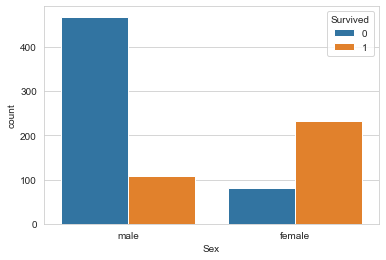

In [168]:
# Countplot sex vs survived
sns.countplot(x ="Sex", hue ="Survived", data = df)

Here 0 indicates non survived and 1 indicates survived .Female survivors are more than double of men survivors.
Majority non survivors are men.

<AxesSubplot:xlabel='Survived', ylabel='count'>

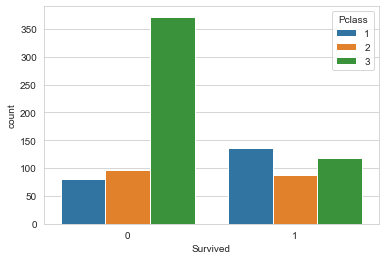

In [169]:
# Countplot Pclass vs survived
sns.countplot(x='Survived',  hue='Pclass', data=df)

Majority non-survivors were in 3rd Class, whereas almost equal number of passenger survived from Pclass 1,2,&3. Class 2 survival number and death number are same. It helps in determining if higher-class passengers had more survival rate than the lower class ones or vice versa. Class 1 passengers have a higher survival chance compared to classes 2 and 3. It implies that Pclass contributes a lot to a passenger’s survival rate.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

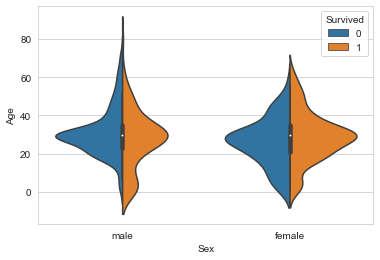

In [170]:
# Violinplot Displays distribution of data based on Age and gender.

sns.violinplot(x ="Sex", y ="Age", hue ="Survived",  
data = df, split = True)

Ladies age between 20-50yrs have higher survival rate. For both male and female though survival rate is higher for women but death rate is approximately same.

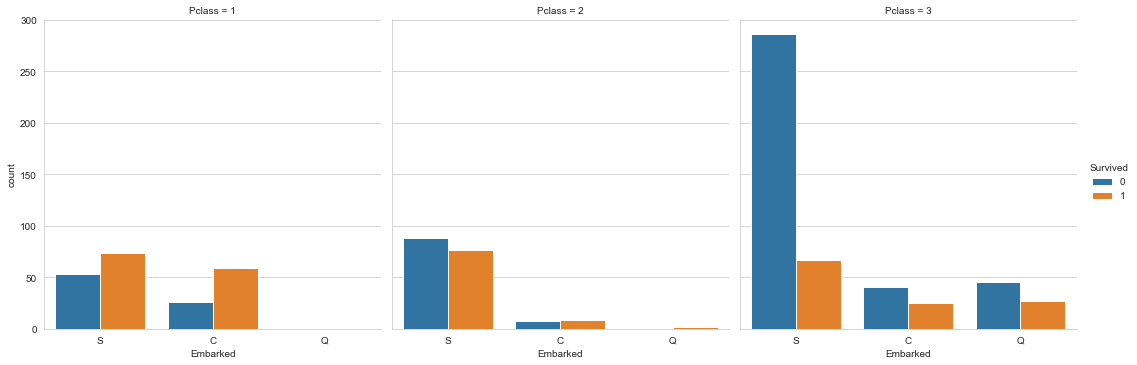

In [171]:
# Countplot 
sns.catplot(x ='Embarked', hue ='Survived',  
kind ='count', col ='Pclass', data = df)

In class 1 & 2 passengers boarded from Q has negligible survived rate and non survived rate.
Notably high death rate in Class three who is boarded from S.
Infact majority of the passengers are boarded from S.

<AxesSubplot:>

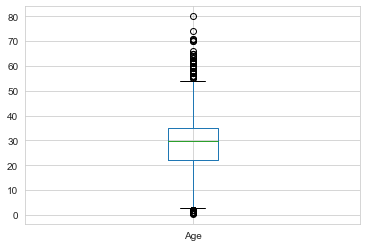

In [172]:
df['Age'].plot.box()

<AxesSubplot:>

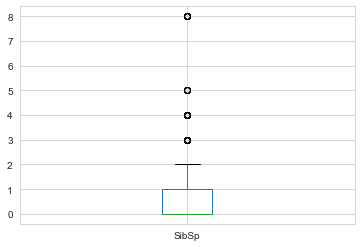

In [173]:
df['SibSp'].plot.box()

<AxesSubplot:>

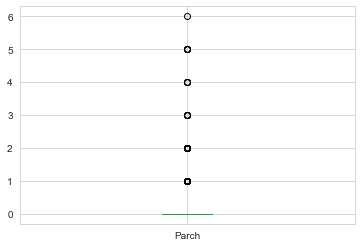

In [174]:
df['Parch'].plot.box()

#outliers are more in Parch column

<AxesSubplot:>

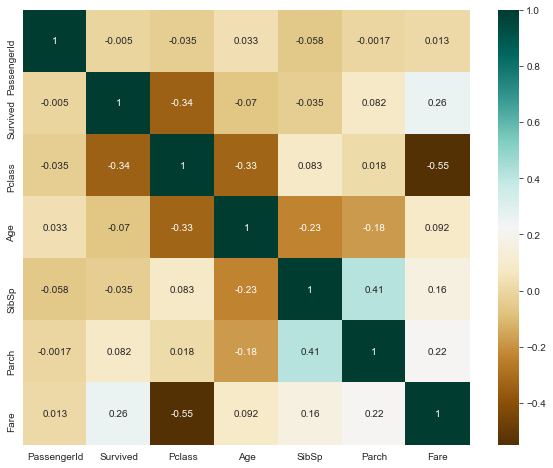

In [175]:
# Heat map to  observe correlation between all variables.

plt.figure(figsize=(10,8))
c=df.corr()
sns.heatmap(c,cmap='BrBG', annot=True)

Parch and Fare are positively correlated with Survived.
Pclass is negatively correlated with target variable.
Age is slightly negatively correlated.

The columns that can be dropped are: Name, Ticket, Cabin: They are strings, cannot be categorized and don’t contribute much to the outcome.

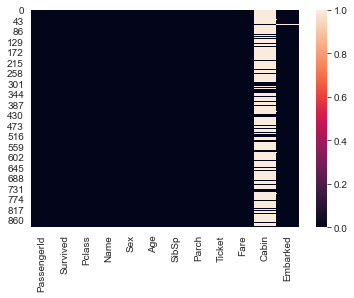

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df.isnull())
plt.show()

DROPPING IRRELEVANT COLUMNS (Low Variance Filter)

In [177]:
#dropping Columns Name,Ticket,Cabin
df.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

In [178]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [179]:
df.shape

(891, 9)

Checking shape of the data.Here we got 891 rows and 9 columns.
3columns are less here (dropped )

# ENCODING

In [180]:
#Embarked column has string .So we should convert it into numeric.
#Here we are using Label encoder to encode the Embarked column .
le=LabelEncoder()
list1=['Sex','Embarked']
for val in list1:
    df[val]=le.fit_transform(df[val].astype(str))

In [181]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


We got the embarked column with numeric values

In [182]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

Again checking the null values.There is no null value here.

In [183]:
#Checking data types
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

In [184]:
df1=df.drop("Survived",axis=1)
df_target=df["Survived"]

In [185]:
print(df.shape,df1.shape,df_target.shape,df1.columns,sep="\n__________________\n")

(891, 9)
__________________
(891, 8)
__________________
(891,)
__________________
Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')


In [186]:
df1.describe

<bound method NDFrame.describe of      PassengerId  Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0              1       3    1  22.000000      1      0   7.2500         2
1              2       1    0  38.000000      1      0  71.2833         0
2              3       3    0  26.000000      0      0   7.9250         2
3              4       1    0  35.000000      1      0  53.1000         2
4              5       3    1  35.000000      0      0   8.0500         2
..           ...     ...  ...        ...    ...    ...      ...       ...
886          887       2    1  27.000000      0      0  13.0000         2
887          888       1    0  19.000000      0      0  30.0000         2
888          889       3    0  29.699118      1      2  23.4500         2
889          890       1    1  26.000000      0      0  30.0000         0
890          891       3    1  32.000000      0      0   7.7500         1

[891 rows x 8 columns]>

Now 891 rows and 8 columns

In [187]:
#Checking the columns which are positively and negatively correlated with target column
df1.corr()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013083
Pclass,-0.035144,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.157112
Sex,0.042939,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.104057
Age,0.033207,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.022239
SibSp,-0.057527,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.066654
Parch,-0.001652,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.038322
Fare,0.012658,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.221226
Embarked,0.013083,0.157112,0.104057,-0.022239,0.066654,0.038322,-0.221226,1.000000


Age and fare columns are negatively correlated with the target column 

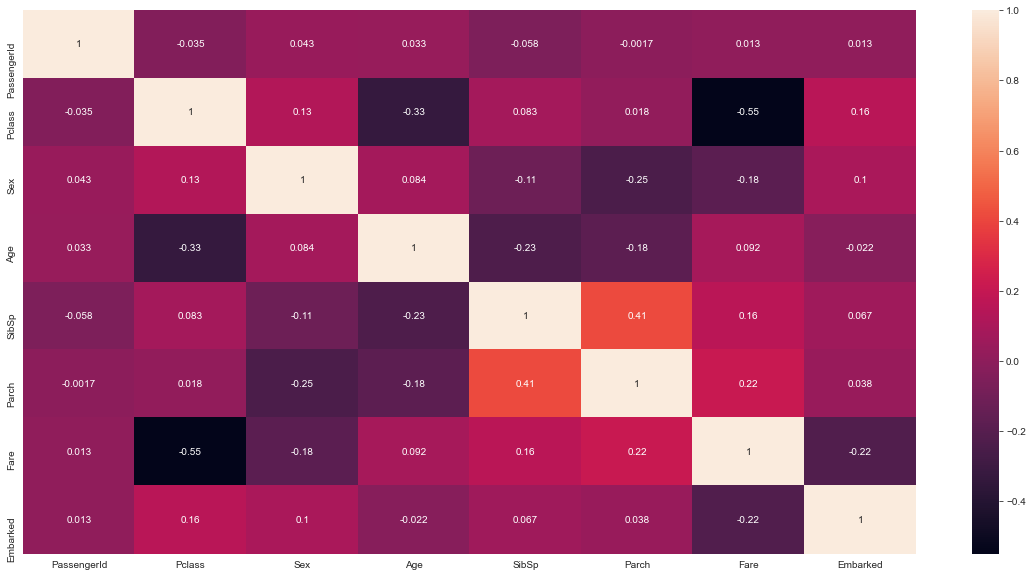

In [188]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(),annot=True)
plt.show()

In [189]:
#Checking skewness
df.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.246689
dtype: float64

Keeping +0.5 to - 0.5 as the range of skewness. Skewness is there for Pclass,sex,Sibsp,Parch,Fare and embarked.

In [190]:
# For correcting skewness we are using the transformation method Z -score
from scipy.stats import zscore
z=np.abs(zscore(df1))
z

array([[1.73010796, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.58111394],
       [1.72622007, 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.93846038],
       [1.72233219, 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        0.58111394],
       ...,
       [1.72233219, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        0.58111394],
       [1.72622007, 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        1.93846038],
       [1.73010796, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.67867322]])

In [191]:
threshold=3
print(np.where(z<3))

(array([  0,   0,   0, ..., 890, 890, 890], dtype=int64), array([0, 1, 2, ..., 5, 6, 7], dtype=int64))


In [192]:
df2=df1[(z<3).all(axis=1)]

In [193]:
df2

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2
887,888,1,0,19.000000,0,0,30.0000,2
888,889,3,0,29.699118,1,2,23.4500,2
889,890,1,1,26.000000,0,0,30.0000,0


In [194]:
df2.skew()

PassengerId    0.003454
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.979577
Parch          2.122629
Fare           2.318761
Embarked      -1.257511
dtype: float64

Still Skewness is there for Pclass,sex,Sibsp,Parch.Fare and embarked.

In [195]:
import numpy as np
for col in df2.columns:
    if df2.skew().loc[col]>0.55:
         df2[col]=np.log1p(df2[col])

In [196]:
df2.skew()

PassengerId    0.003454
Pclass        -0.632242
Sex           -0.664152
Age            0.318314
SibSp          1.292829
Parch          1.832391
Fare           0.196364
Embarked      -1.257511
dtype: float64

Again checked skewness .Skewness of fare has removed.skewness of parch has reduced.But still having skewness for Pclass,sex,Sibsp,Parch and embarked.But we are not going to remove skewness .

In [197]:
#Checking the outliers of the int and float type of columns
df2.dtypes

PassengerId      int64
Pclass           int64
Sex              int32
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Embarked         int32
dtype: object

<AxesSubplot:xlabel='count', ylabel='Survived'>

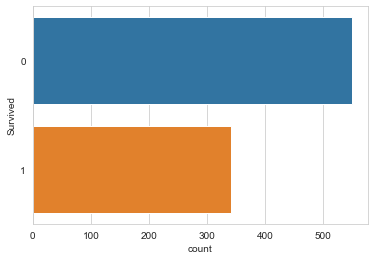

In [198]:
sns.set_style('whitegrid')
sns.countplot(y='Survived',data=df)

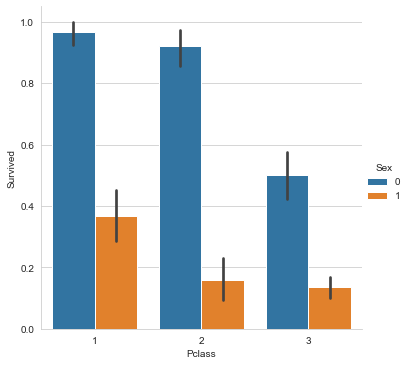

In [199]:
sns.catplot(x="Pclass",y="Survived",hue="Sex",data=df,kind="bar")
plt.show()

<AxesSubplot:xlabel='SibSp', ylabel='count'>

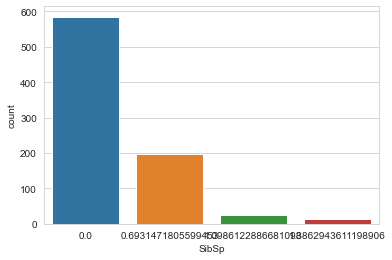

In [200]:
sns.countplot(x='SibSp',data=df2)

<AxesSubplot:xlabel='Fare', ylabel='count'>

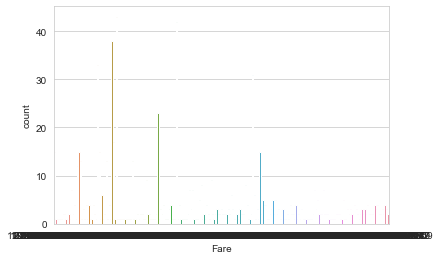

In [201]:
sns.countplot(x='Fare',data=df2)

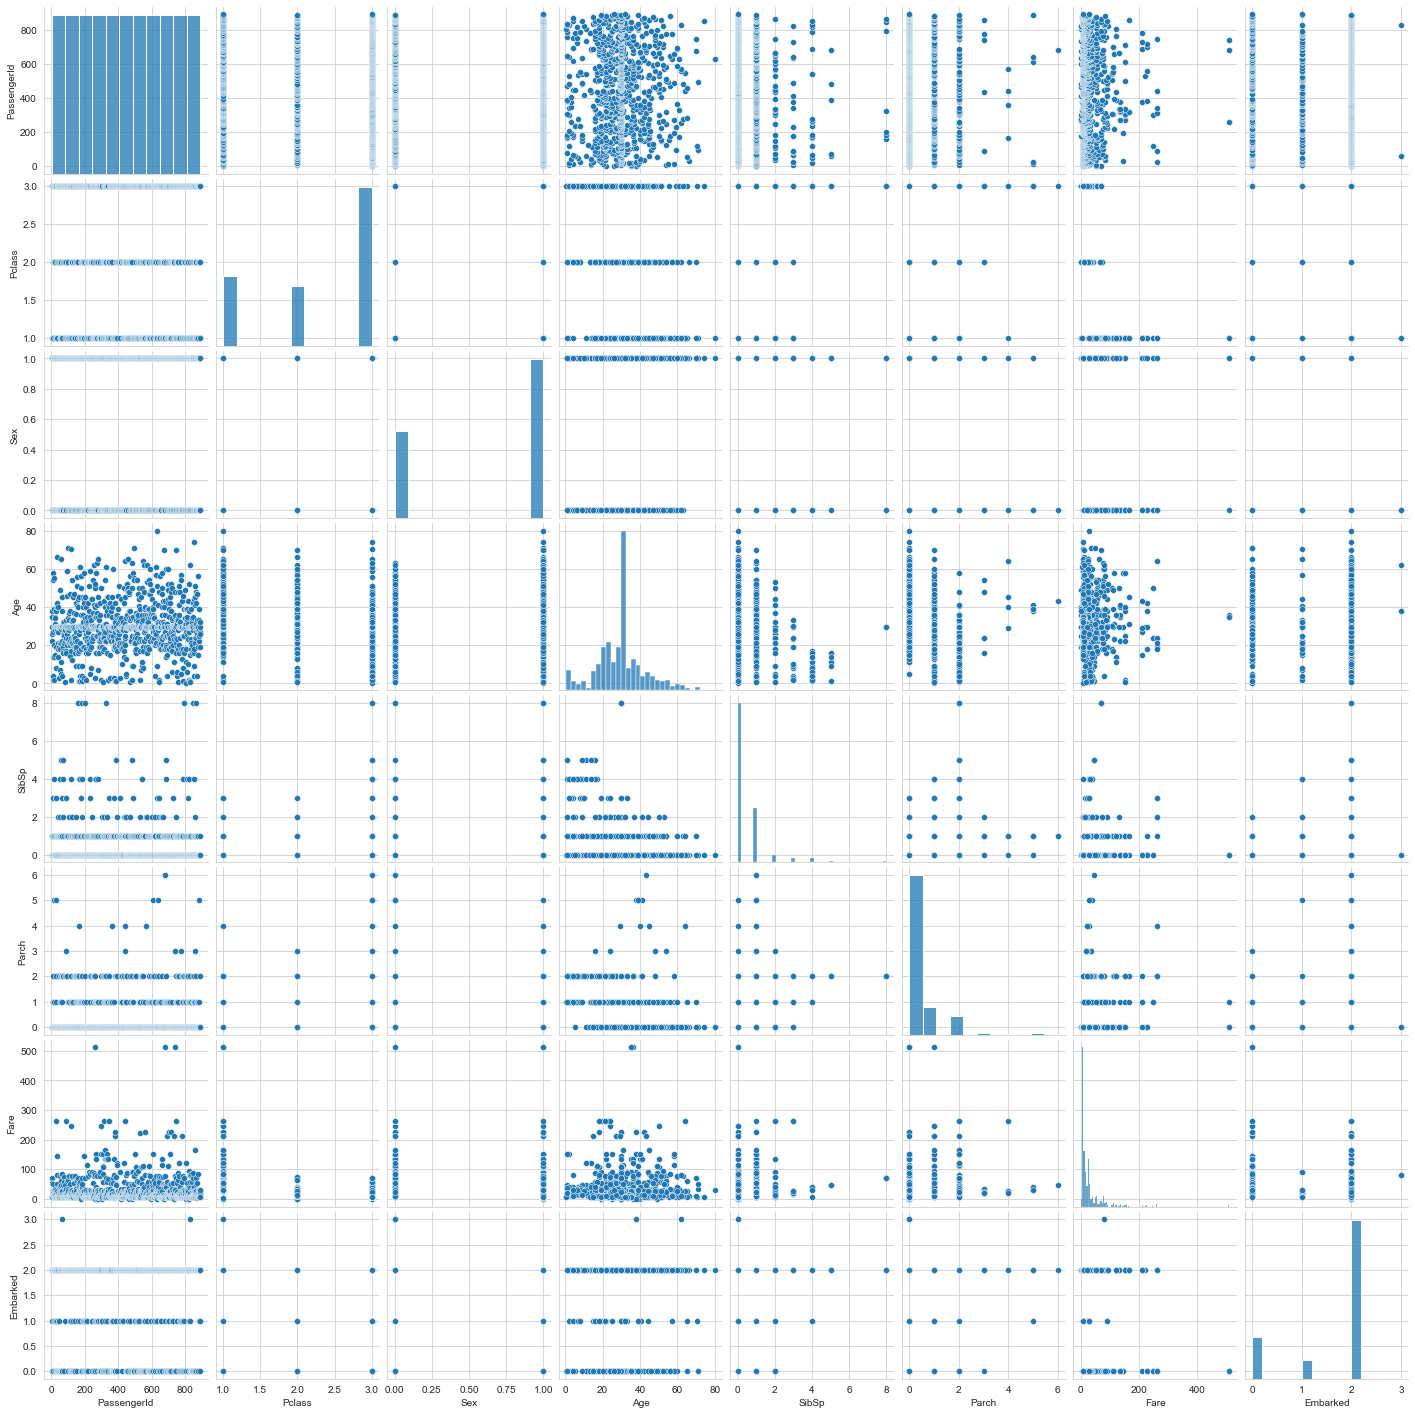

In [202]:
sns.pairplot(df1)

# Modelling of Data

In [234]:
# Separating dependent and independent variable.

y= df['Survived']
x= df.drop('Survived',axis=1)

In [235]:
# Train test split

x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=.30, random_state=42)

LOGISTIC REGRESSION

In [242]:
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
predlr= lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.7835820895522388
[[133  24]
 [ 34  77]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       157
           1       0.76      0.69      0.73       111

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



DECISION TREE CLASSIFIER

In [237]:
dtc= DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.7761194029850746
[[129  28]
 [ 32  79]]
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       157
           1       0.74      0.71      0.72       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



CROSS VALIDATING SCORES

In [238]:
# Cross Validating Logistic Regression
scr1= cross_val_score( lr,x,y, cv=10)
print("Cross Validated score for LR is:",scr1.mean())

# Cross Validating DTC
scr2= cross_val_score( dtc,x,y, cv=10)
print("Cross Validated score for DTC is:",scr2.mean())

Cross Validated score for LR is: 0.7811860174781523
Cross Validated score for DTC is: 0.7531460674157303


FINDING BEST PARAMETER

In [239]:
#Tuning the hyperparameters for Logistic Regression model using GridSearch.
#Grid
parameter_grid = {'C': [0.01, 0.1, 1, 2, 10, 100], 'penalty': ['l1', 'l2']}
#Gridsearch
gridsearch = GridSearchCV(lr, parameter_grid)
gridsearch.fit(x_train, y_train);

#Get best hyperparameters
gridsearch.best_params_

{'C': 100, 'penalty': 'l2'}

In [240]:
#Let’s run our LR again with the best parameters.
lr2 = LogisticRegression(C = 0.1, penalty= 'l2')
lr2.fit(x_train, y_train)
pred_lr2 = lr2.predict(x_test)
print('Confusion matrix')
print(confusion_matrix(y_test, pred_lr2))
print('Classification report')
print(classification_report(y_test, pred_lr2))
print('Accuracy score',accuracy_score(y_test, pred_lr2))

Confusion matrix
[[137  20]
 [ 35  76]]
Classification report
              precision    recall  f1-score   support

           0       0.80      0.87      0.83       157
           1       0.79      0.68      0.73       111

    accuracy                           0.79       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

Accuracy score 0.7947761194029851


With hyperparameter tuning, Accuracy score of LogisticRegression improved to 78% from 79.4%

# SAVING THE BEST MODEL¶

In [241]:
import pickle
# save the model to disk
filename = 'finalized_model_LR.pkl'
pickle.dump(lr,open(filename,'wb'))
#Load the model from disk
loaded_model= pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)